# Introduction to Image Processing
This notebook explains core concepts for Image Processing using Python, numpy and skimage.

## Preparation

In [ ]:
import matplotlib.pyplot as plt

# plots directly in the notebook
%matplotlib inline 

# make figures larger
plt.rcParams["figure.figsize"] = (10,20)

# if you have a high-dpi monitor
#%config InlineBackend.figure_format = 'retina' 

## Fun with grayscale images
Grayscale images are 2-dimensional numpy arrays. Values represent the intensity of each pixel.

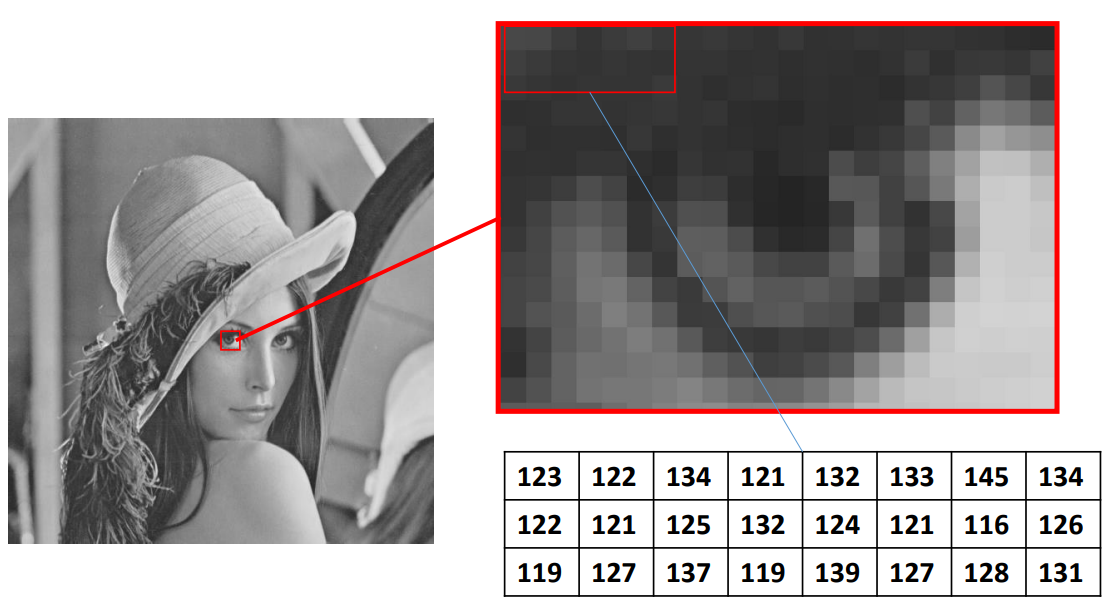

### Note: our perceived brightness is mediated by our brain. It might not match the true intensity values in the image!
Our brains are very good at ignoring intensity differences due to irrelevant things (eg lighting, shadows, etc). See [this amazing illusion](https://en.wikipedia.org/wiki/Checker_shadow_illusion).

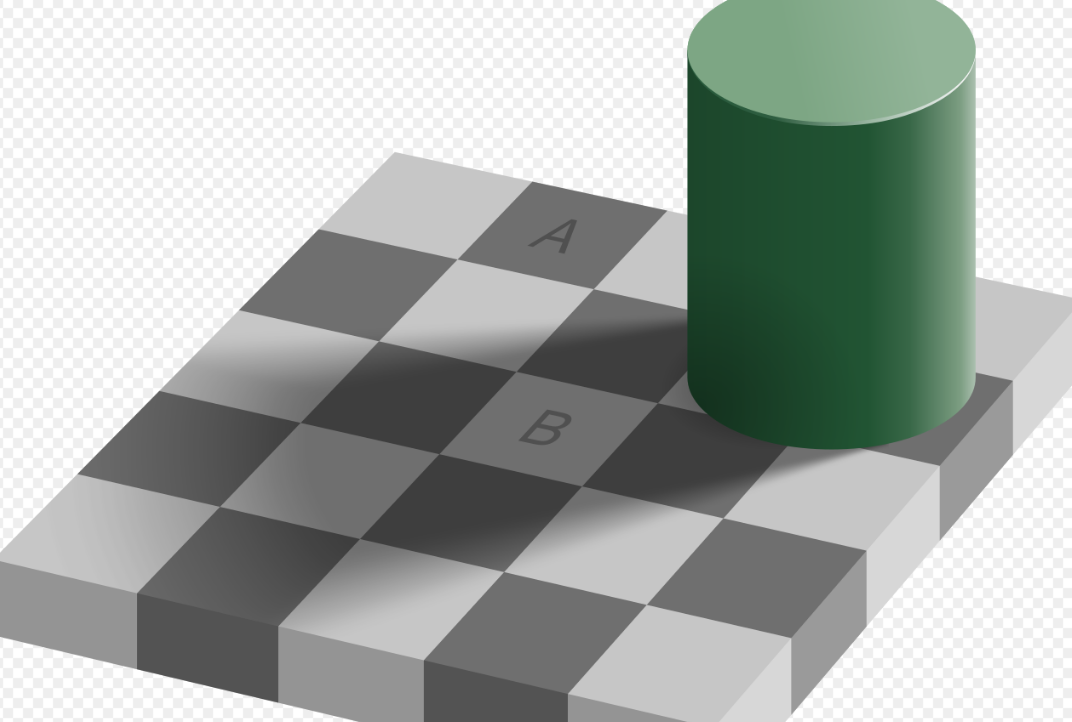

### Load and display a grayscale image

In [ ]:
import numpy as np
import skimage
import skimage.data
import skimage.io
im = skimage.data.camera()
# to read from a file: skimage.io.imread("myimage.png")
print(im.shape)
print(im.dtype)

### Be wary of `uint8` arithmetic

uint8 means one byte per pixel (values 0-255)

*Warning!*  Be careful when working with `uint8` data!  uint8 arithmetic wraps around.

In [ ]:
print(np.array([255],dtype="uint8")+1)

a = np.array([100],dtype="uint8")
print(a, a*2, a*3)

### Display a `uint8` grayscale image
To display a grayscale image, use `imshow`.  Tip: always use `vmin` and `vmax` parameters to set the colors that should map to black and white.  Different versions of matplotlib have different behaviors otherwise.

In [ ]:
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

Note the viridis colormap.  In image processing, we normally display grayscale images with a grayscale colormap.

In [ ]:
plt.imshow(im,
           vmin=0,   # value which maps to black
           vmax=255, # value which maps to white
           cmap="gray")
plt.colorbar();

Read the [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) for imshow!

### Floating point images
`uint8` images should be always displayed with a range from 0 (black) to 255 (white).
Instead, floating point images conventionally use a range from 0 (black) to 1 (white), unless specified otherwise.

In [ ]:
im_float = im/255
# 0 stays 0; 255 becomes 1

print(im_float.dtype)
plt.imshow(im_float, cmap="gray", vmin=0, vmax=1)
# plt.colorbar()

## Simple geometric transformations
Can you guess what each of the following operations does on the image?

In [ ]:
plt.imshow(np.vstack((im_float, im_float)),
           cmap="gray", vmin=0, vmax=1);

In [ ]:
plt.imshow(np.hstack((im_float, im_float)),
           cmap="gray", vmin=0, vmax=1);

In [ ]:
plt.imshow(np.hstack((
                im_float,
                im_float[:,::-1] # what if I write -2 or -4?
           )), cmap="gray", vmin=0, vmax=1);

## Simple intensity transformations

In [ ]:
plt.imshow(np.hstack((
                im_float,
                im_float * 2 # what happens to the intensity values?
           )), cmap="gray", vmin=0, vmax=1);

In [ ]:
# Try to predict: what happens to black in the two cases?
plt.imshow(np.hstack((
                im_float,
                im_float * 2,   # changes contrast
                im_float + 0.5  # changes brightness
           )), cmap="gray", vmin=0, vmax=1);

In [ ]:
import ipywidgets as ipw

@ipw.interact(brightness=ipw.FloatSlider(min=-1,max=+1))
def f(brightness):
    plt.imshow(np.hstack((
                im_float,
                im_float + brightness
           )), cmap="gray", vmin=0, vmax=1);

In [ ]:
import ipywidgets as ipw

@ipw.interact(brightness=ipw.FloatSlider(min=-1, max=+1, value=0),
              contrast  =ipw.FloatSlider(min=-1, max=+3, value=1))
def f(brightness, contrast):
    plt.imshow(np.hstack((
                im_float,
                (im_float - 0.5) * contrast + 0.5 + brightness
           )), cmap="gray", vmin=0, vmax=1);

### Exercise 1.1
Read the grayscale image file `snoopy.png` and write simple code to generate an image like the one below.
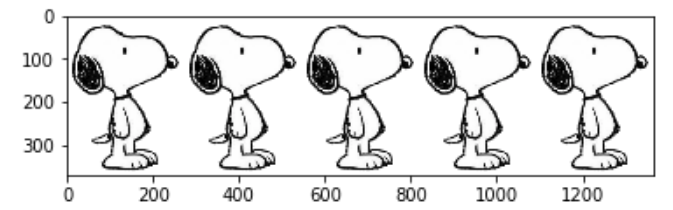

In [ ]:
# Solution
im = skimage.io.imread("data/snoopy.png")
ims = []
for i in range(5):
    ims.append(im[:,::-1])
plt.imshow(np.hstack(ims),
           vmin=0, vmax=255, cmap="gray")

### Exercise 1.2
Read the grayscale image file `snoopy.png` and write simple code to generate an image like the one below.
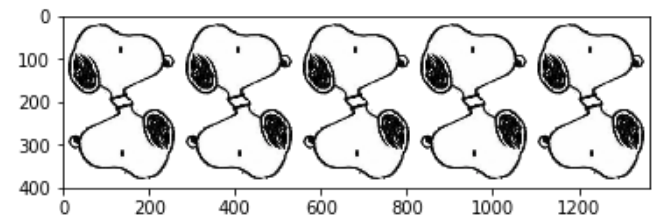

In [ ]:
# Solution
im = skimage.io.imread("data/snoopy.png")
ims = []
for i in range(5):
    ims.append(np.vstack((
        im[:200,::-1],
        im[200:0:-1,:]
    )))
plt.imshow(np.hstack(ims),
           vmin=0, vmax=255, cmap="gray")

### Esercise 1.3 (hard): disappearing snoopy
Read the grayscale image file `snoopy.png` and write simple code to generate an image like the one below.  Tip: convert the image to floating point!
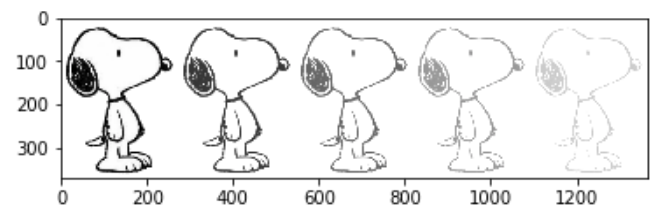

In [ ]:
# Solution
im = skimage.io.imread("data/snoopy.png")
im = im/255
ims = []
for i in range(5):
    ims.append(im[:,::-1] + i*0.2)
plt.imshow(np.hstack(ims),
           vmin=0, vmax=1, cmap="gray")

## Handling color images
Color images are three-dimensional numpy array whose third dimension has length 3.  These are called *channels* and correspond to red, gree, blue intensities for each pixel.

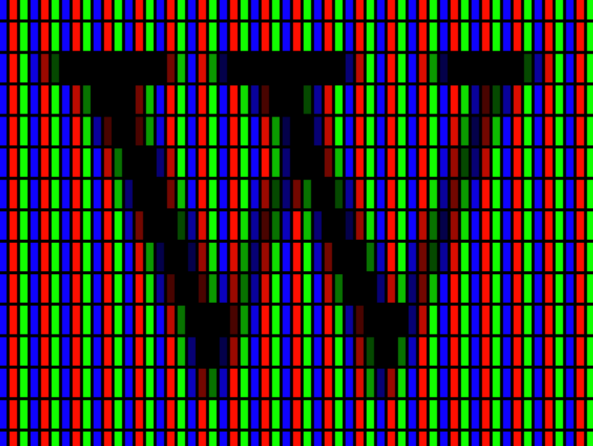

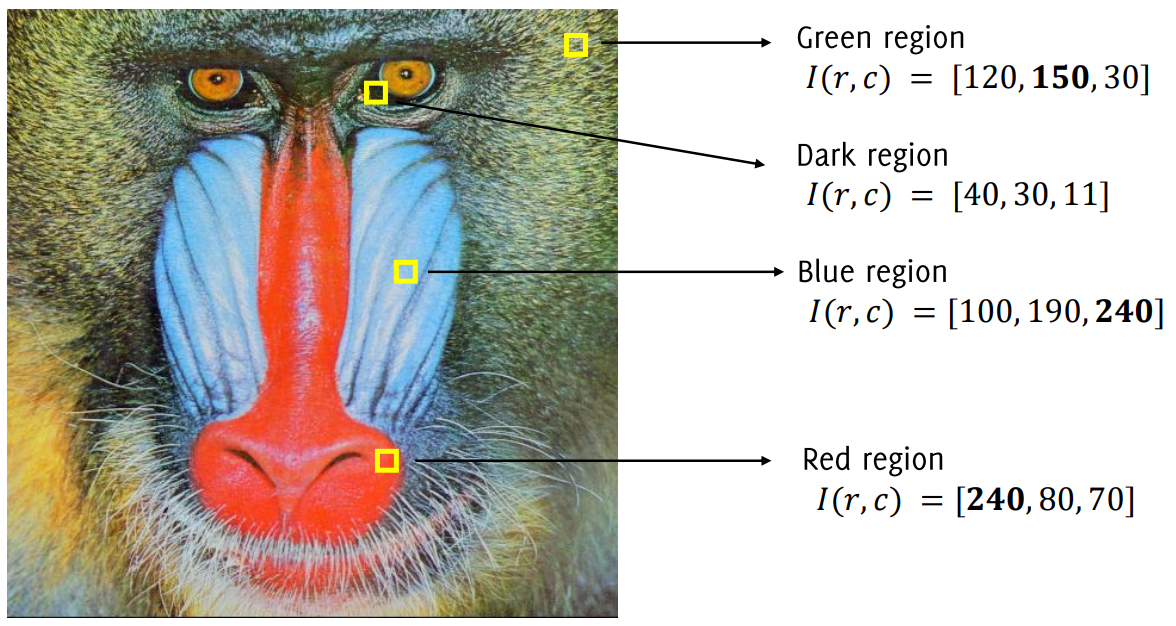

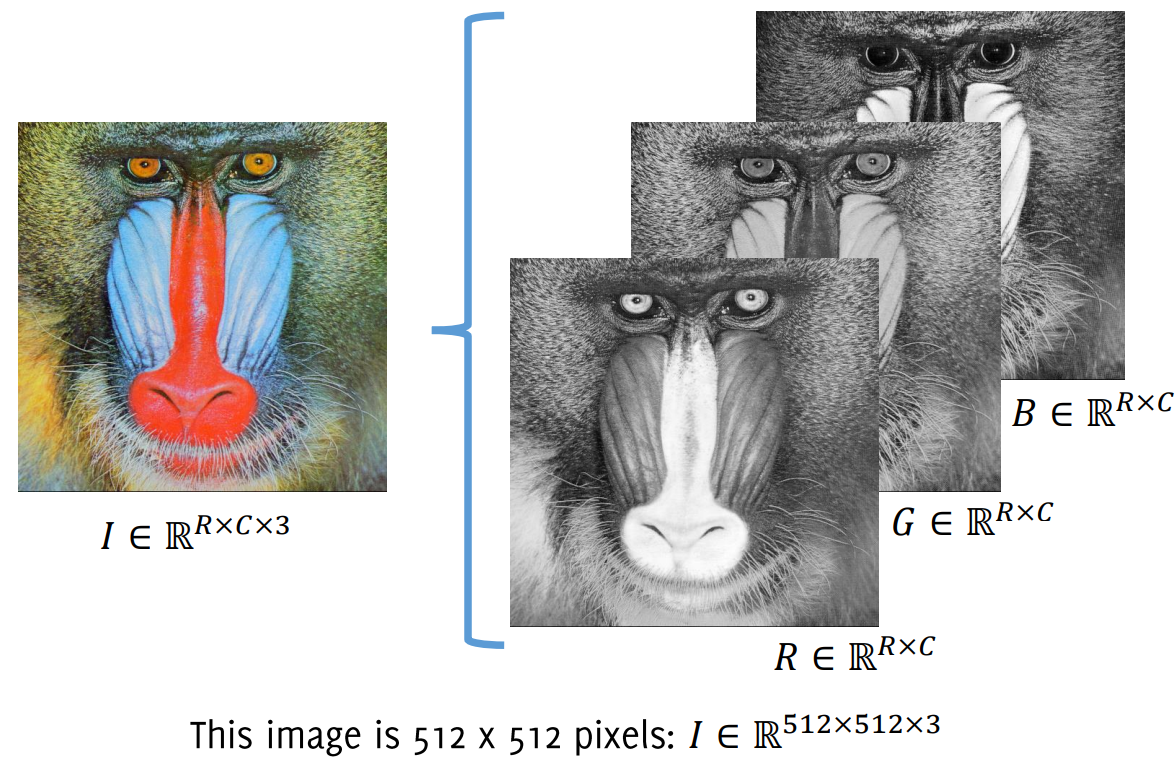

### Load a color image

In [ ]:
import skimage
import skimage.data
import matplotlib.pyplot as plt
im = skimage.data.coffee()
print(im.shape, im.dtype) # note third dimension
plt.imshow(im)

In [ ]:
# Visualize the red, green, blue channels as grayscale images
plt.imshow(np.hstack((
        im[:,:,0],
        im[:,:,1],
        im[:,:,2])),
    vmin=0, vmax=255, cmap="gray")

### Exercise 1.4: flags
Choose one or two flags.  For each, build an image as a 3d array with 300 rows, 400 columns and 3 channels (`shape` should be `(200,300,3)`).  Then, display it.  If you need to know rgb values for a color, have a look here: https://en.wikipedia.org/wiki/Web_colors.  Even better: wikipedia has the exact RGB colors for each flag.

#### Very easy
Germany, France, Italy, Sweden ...

#### Easy
Switzerland

#### Medium
Flag of scotland
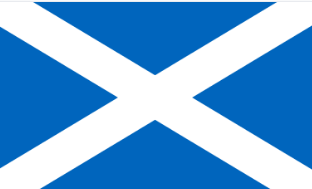

#### Hard
Flag of japan

Trick: make the following arrays with the requested shape `(200,300)`:
- the array containing the x coordinate of each element
- the array containing the y coordinate of each element
- the array containing the distance from the center of each element

once you have that, building the flag is trivial.  Have a try, then look at the solution.

In [ ]:
# Hint: solution for the flag of Japan
h,w = 200,300
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(15,5))
flag = np.zeros((h,w,3)) + 1.0

x_distancefromcenter = (np.arange(0,w)-(w/2))[np.newaxis,:]
print(x_distancefromcenter.shape)

y_distancefromcenter = (np.arange(0,h)-(h/2))[:,np.newaxis]
print(y_distancefromcenter.shape)

distancefromcenter = (x_distancefromcenter**2 + y_distancefromcenter**2)**0.5 # note automatic broadcasting
him = ax0.imshow((x_distancefromcenter**2 + y_distancefromcenter**2)**0.5)
plt.colorbar(him,ax=ax0)
ax0.set_title("distance from center")

flag[distancefromcenter<80,:] = np.array([[[1.0, 0, 0]]])
ax1.imshow(flag)
ax1.set_title("Flag as float values (0-1)")

flag = (flag*255).astype("ubyte")
ax2.imshow(flag)
ax2.set_title("Flag as int values (0-255)")

## Handling video data
Videos are just a sequence of multiple frames.  Let's read in all frames of a brief video.

In [ ]:
ims = []
for i in range(1,43):
    ims.append(skimage.io.imread(f"data/video_frames/{i:08d}.png"))
ims = np.array(ims)
print(ims.shape)
    
@ipw.interact(i=ipw.IntSlider(min=0,max=len(ims)-1))
def f(i):
    plt.imshow(ims[i])

### What happens if we average multiple frames?

In [ ]:
avg = np.mean(ims[10:12,:,:,:], 
              axis=0)

plt.imshow(avg.astype("uint8"))

We are creating *motion blur*

### Exercise 1.5
Take the *median* (use `np.median`) of all frames in the video. The result only shows the background and not any moving objects! (why?)

Now, for each frame, check if the value of any of the rgb channels deviates by more than a given threshold from the background.  Can you isolate the shape of the moving person?

# Extra
## Extra exercise
Read the snoopy file from wikipedia at the link given below.  You will notice that it has four color channels. These are Red, Green, Blue and Alpha (i.e. transparency).
We want to build a grayscale image which is white everywhere except for the black lines along snoopy.
- Load the image
- Visualize the red, green, blue and alpha channels separately
- Do some magic and obtain an image with a single channel (two dimensions)
- Save the resulting grayscale image using `skimage.io.imsave(image, filename)`

In [ ]:
# Solution sketch
im = skimage.io.imread("https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png")
print(im.shape, im.dtype)

# ...

In [ ]:
# Solution

im = skimage.io.imread("https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png")
im_red = im[:,:,0]
im_alpha = im[:,:,3]
res = im_red
res[im_alpha==0] = 255 # make the result white where image is transparent
skimage.io.imsave("snoopy.png",res)